In [14]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Read in file
file = "Resources/combined_crimes.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head(10) #956, 8

,date,team,player,position,crimeraw,desc
0,1/17/2020,NE,Joejuan Williams,CB,drugs,"Pulled over for speeding in Nashville, accused..."
1,1/16/2020,CLE,Odell Beckham,WR,battery,Accused of slapping the buttocks of a police o...
2,1/11/2020,NE,Julian Edelman,WR,vandalism,Accused of jumping on the hood of a Mercedes i...
3,12/29/2019,MIA,Xavien Howard,CB,domestic violence,"Police in Davie, Fla., say he pushed his fianc..."
4,12/20/2019,PIT,Kameron Kelly,S,disorderly conduct,Accused of making threats and resisting arrest...
5,12/3/2019,DAL,Antwaun Woods,DT,drugs,"Pulled over for speeding in Frisco, Texas, and..."
6,11/19/2019,MIA,Mark Walton,RB,domestic violence,Police say he punched his pregnant girlfriend ...
7,11/6/2019,DAL,Daniel Ross,DT,drugs,Accused of marijuana possession and unlawful c...
8,11/6/2019,DAL,Daniel Ross,DT,firearms,Accused of marijuana possession and unlawful c...
9,10/27/2019,MIN,Jayron Kearse,S,dui,"Accused of driving drunk in Minneapolis, with ..."


In [7]:
df.crimeraw = df.crimeraw.str.lower()

In [17]:
df[["Crime 1", "Crime 2", "Crime 3"]] = df.CATEGORY.str.split(",", expand=True)
df["crime_list"] = df.CATEGORY.str.split(",")
df["crime_count"] = df.crime_list.str.len()
df.head()

,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME,Crime 1,Crime 2,Crime 3,crime_list,crime_count
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.,drugs,None,None,[drugs],1
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.,battery,None,None,[battery],1
2,1/11/2020,NE,Julian Edelman,WR,Arrested,vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.,vandalism,None,None,[vandalism],1
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.,domestic violence,None,None,[domestic violence],1
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...,disorderly conduct,None,None,[disorderly conduct],1


In [18]:
df_col_names = ['date', 'team', 'player', 'position', 'status', 'crimeraw', 
                'desc', 'outcome', 'crime1', 'crime2', 'crime3', 'crime_list', 'crime_count']
df.columns = df_col_names
df

,date,team,player,position,status,crimeraw,desc,outcome,crime1,crime2,crime3,crime_list,crime_count
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.,drugs,None,None,[drugs],1
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.,battery,None,None,[battery],1
2,1/11/2020,NE,Julian Edelman,WR,Arrested,vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.,vandalism,None,None,[vandalism],1
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.,domestic violence,None,None,[domestic violence],1
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...,disorderly conduct,None,None,[disorderly conduct],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2/6/2000,IND,Keith Elias,RB,Arrested,disorderly conduct,Accused of resisting arrest and disorderly con...,"Pleaded guilty to nuisance violation, fined $230.",disorderly conduct,None,None,[disorderly conduct],1
952,2/5/2000,CIN,Steve Foley,LB,Arrested,domestic violence,Accused of kicking in the door of his son's mo...,Charge dropped after woman declined to cooperate.,domestic violence,None,None,[domestic violence],1
953,2/3/2000,CAR,Fred Lane,RB,Arrested,"drugs, gun","Police pulled him over in Jackson, Tenn., for ...",Indicted but shot and killed by his wife in Ju...,drugs,gun,None,"[drugs, gun]",2
954,1/31/2000,BAL,Ray Lewis,LB,Charged,murder,Accused of murder in the stabbing deaths of tw...,"Pleaded guilty to obstruction of justice, one ...",murder,None,None,[murder],1


In [19]:
df.to_csv('Resources/clean.csv', index=False)

In [20]:
offense = ['WR', 'RB', 'OT', 'TE', 'QB', 'OC', 'OG', 'FB', 'K', 'OL', 'C', 'P']
defense = ['CB', 'S', 'DT', 'LB', 'DE', 'DB', 'DT']

In [21]:
offense_crime_df = df.loc[df.position.isin(offense), ["player", "position", "crime_count"]]
offense_crime_df.to_csv('Resources/offense_crime.csv', index=False)
offense_crime_df.head()

,player,position,crime_count
1,Odell Beckham,WR,1
2,Julian Edelman,WR,1
6,Mark Walton,RB,1
9,Davion Davis,WR,1
15,Desmond Harrison,OT,1


In [22]:
defense_crime_df = df.loc[df.position.isin(defense), ["player", "position", "crime_count"]]
defense_crime_df.to_csv('Resources/defense_crime.csv', index=False)
defense_crime_df.head()

,player,position,crime_count
0,Joejuan Williams,CB,1
3,Xavien Howard,CB,1
4,Kameron Kelly,S,1
5,Antwaun Woods,DT,1
7,Daniel Ross,DT,2


In [23]:
#create team count for number of crimes
TeamCrimeCount = df.groupby('team').count()['position'].sort_values(ascending=False)
TeamCrimeCount = TeamCrimeCount.drop(['Free Agent', 'Free agent'])
TeamCrimeCount

team
MIN    62
DEN    55
CIN    53
JAC    43
CLE    42
KC     41
TEN    39
IND    39
TB     38
MIA    37
BAL    34
SF     33
CHI    33
DAL    31
GB     31
SEA    30
ARI    29
NYJ    29
NO     29
SD     29
CAR    28
NE     27
PIT    27
OAK    25
WAS    25
NYG    24
BUF    24
ATL    23
PHI    22
DET    20
HOU    16
STL    12
LAR     7
LAC     1
Name: position, dtype: int64

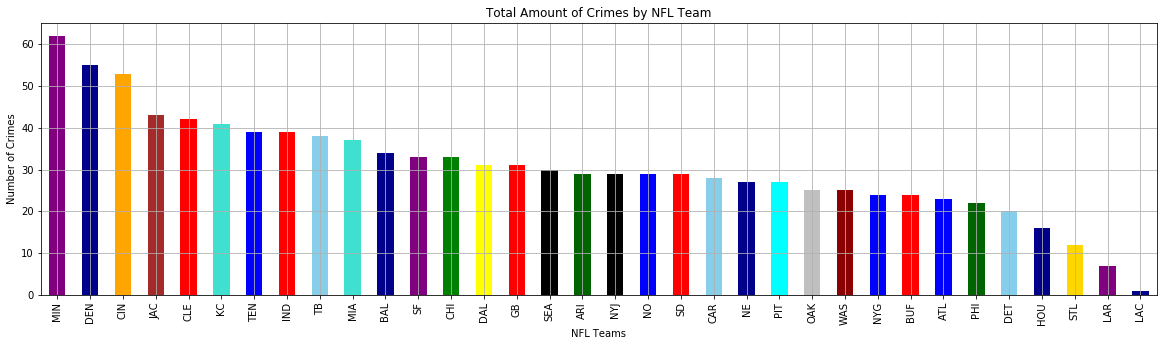

In [24]:
CrimeChart = TeamCrimeCount.plot(kind='bar', color=['purple', 'DarkBlue', 'orange', 'brown', 'red', 'turquoise', 'blue', 'red', 'skyblue', 'turquoise', 'darkblue', 'purple', 'green', 'yellow', 'red', 'black', 'darkgreen', 'black', 'blue', 'red', 'skyblue', 'darkblue', 'cyan', 'silver', 'darkred', 'blue', 'red', 'blue', 'darkgreen', 'skyblue', 'darkblue', 'gold'], title='Total Amount of Crimes by NFL Team', grid=True, figsize=(20,5))
CrimeChart.set_xlabel("NFL Teams")
CrimeChart.set_ylabel("Number of Crimes")
ax = CrimeChart
fig = ax.get_figure()
fig.savefig('../output/CrimesByTeam')